In [111]:
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
local_path = '/home/ikharitonov/spikeinterface_datasets/ephy_testing_data/mearec/mearec_test_10s.h5'
recording, sorting_true = se.read_mearec(local_path)
print(recording)


MEArecRecordingExtractor: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                          float32 dtype - 39.06 MiB
  file_path: /home/ikharitonov/spikeinterface_datasets/ephy_testing_data/mearec/mearec_test_10s.h5


In [5]:
print(sorting_true)

MEArecSortingExtractor: 10 units - 1 segments - 32.0kHz
  file_path: /home/ikharitonov/spikeinterface_datasets/ephy_testing_data/mearec/mearec_test_10s.h5


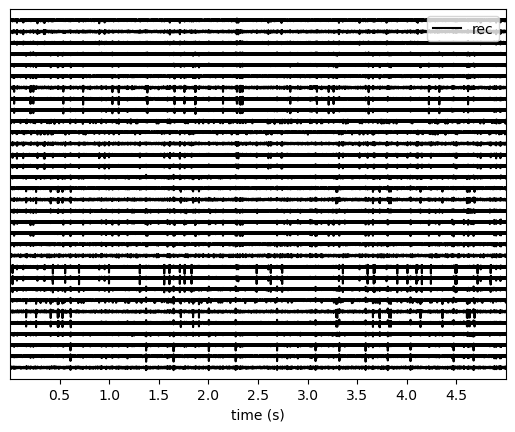

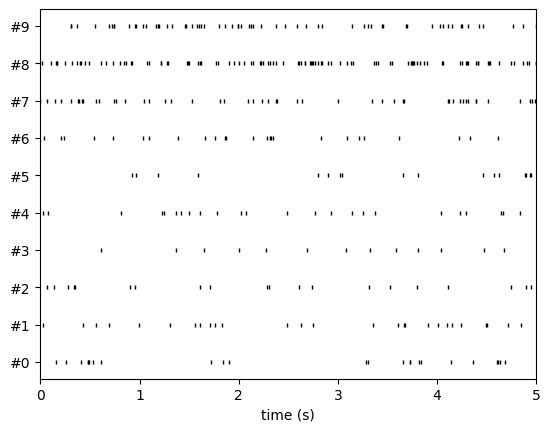

In [7]:
w_ts = sw.plot_timeseries(recording, time_range=(0, 5))
w_rs = sw.plot_rasters(sorting_true, time_range=(0, 5))

In [8]:
sorting = ss.run_sorter('kilosort3',recording=recording,output_folder="kilosort3",singularity_image='/home/ikharitonov/kilosort3-compiled-base.sif', verbose=True)

Starting container
Installing spikeinterface==0.98.2 in /home/ikharitonov/kilosort3-compiled-base.sif
Installing extra requirements: ['neo', 'mearec']
Running kilosort3 sorter inside /home/ikharitonov/kilosort3-compiled-base.sif
Stopping container


In [9]:
print("kilosort3 sorting",sorting)

kilosort3 sorting KiloSortSortingExtractor: 19 units - 1 segments - 32.0kHz


In [10]:
print('Units found by kilosort3:', sorting.get_unit_ids())

Units found by kilosort3: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [99]:
np.unique(sorted_unit_spikes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [89]:
sorted_spike_times = sorting.get_all_spike_trains()[0][0]
sorted_unit_spikes = sorting.get_all_spike_trains()[0][1]

In [90]:
true_spike_times = sorting_true.get_all_spike_trains()[0][0]
true_unit_spikes = sorting_true.get_all_spike_trains()[0][1]

In [91]:
true_st_list = []
for v in np.unique(true_unit_spikes):
    inds = np.where(true_unit_spikes == v)
    true_st_list.append(true_spike_times[inds])
    
sorted_st_list = []
for v in np.unique(sorted_unit_spikes):
    inds = np.where(sorted_unit_spikes == v)
    sorted_st_list.append(sorted_spike_times[inds])

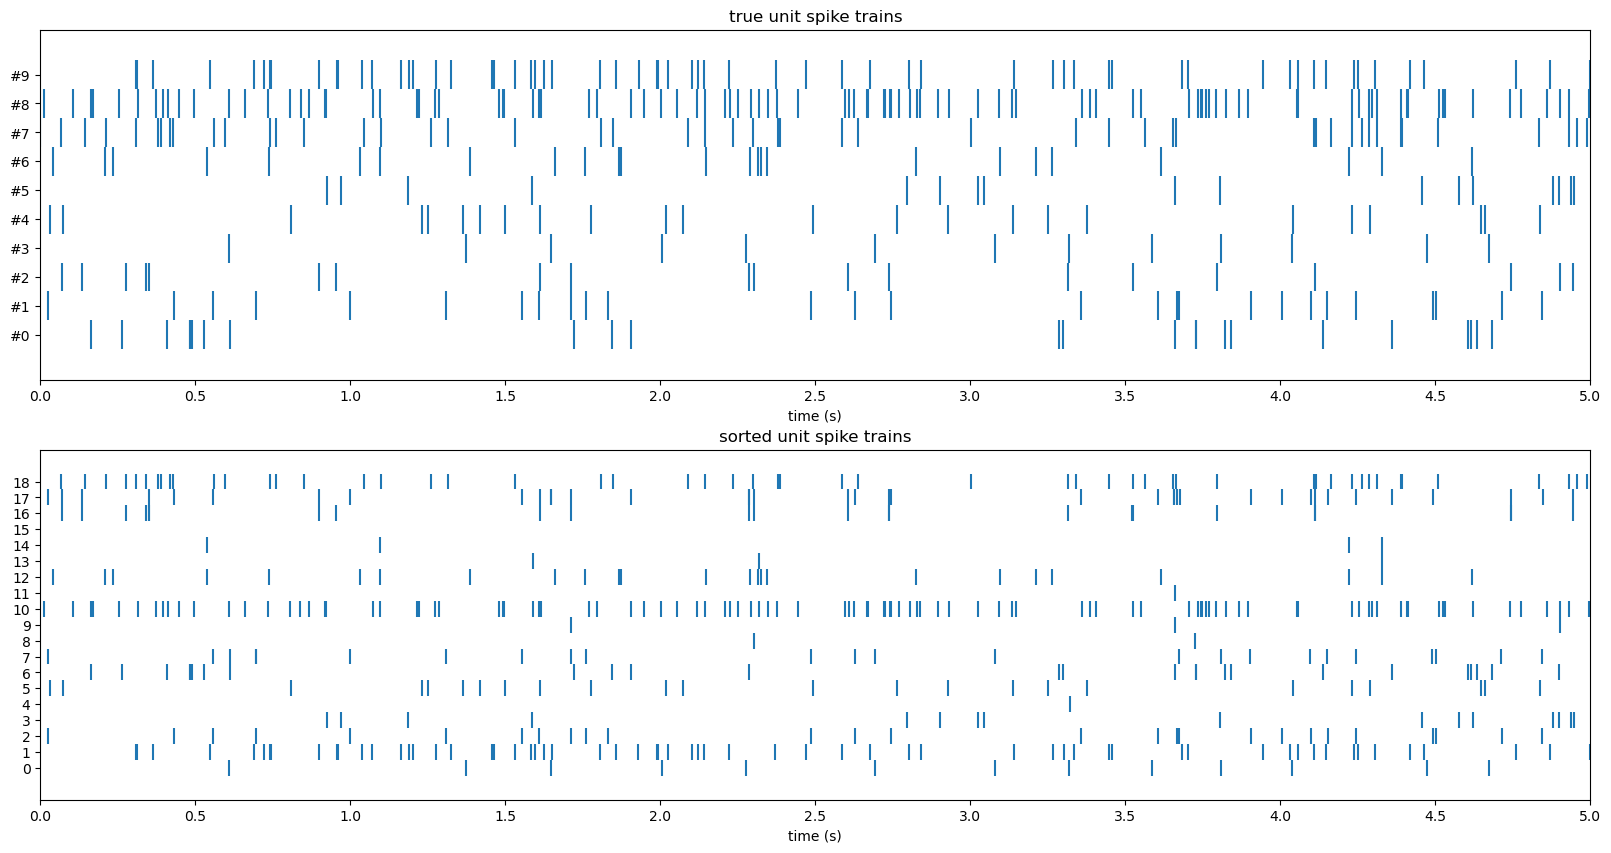

In [109]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

ax[0].set_title('true unit spike trains')
ax[0].eventplot(true_st_list)
ax[0].set_xticks(np.arange(0, 320000, 320000/20))
ax[0].set_xticklabels(np.arange(0, 10, 10/20))
ax[0].set_xlim([0, 5 * recording.sampling_frequency])
ax[0].set_yticks([x for x in range(len(np.unique(true_unit_spikes)))])
ax[0].set_yticklabels(np.unique(true_unit_spikes))
ax[0].set_xlabel('time (s)')

ax[1].set_title('sorted unit spike trains')
ax[1].eventplot(sorted_st_list)
ax[1].set_xticks(np.arange(0, 320000, 320000/20))
ax[1].set_xticklabels(np.arange(0, 10, 10/20))
ax[1].set_xlim([0, 5 * recording.sampling_frequency])
ax[1].set_yticks([x for x in range(len(np.unique(sorted_unit_spikes)))])
ax[1].set_yticklabels(np.unique(sorted_unit_spikes))
ax[1].set_xlabel('time (s)')

plt.show()